In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

### IMPORT DATASET

In [2]:
dataset = pd.read_pickle('CarPricesData.pkl')
dataset.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


### Separate Predictor Variables from Target Variable 

In [3]:
Predictors = ['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']
Target = ['Price']

X = dataset[Predictors].values
y = dataset[Target].values

In [4]:
display(X.shape, y.shape)

(1435, 7)

(1435, 1)

### Histogram of target values

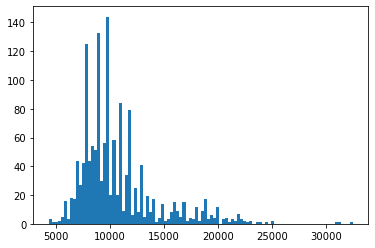

In [5]:
count, bins, ignored = plt.hist(y, 100)
plt.show()

### Scale predictors and target values

In [6]:
PredictorScaler = StandardScaler()
Xscaled = PredictorScaler.fit_transform(X)

TargetScaler = StandardScaler()
yscaled = TargetScaler.fit_transform(y)

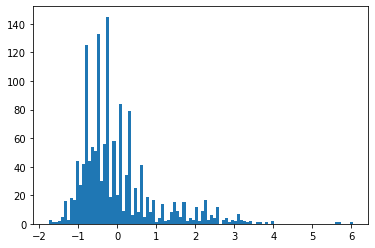

In [7]:
count, bins, ignored = plt.hist(yscaled, 100)

plt.show()

### SPLIT DATASET INTO TRAINING AND TESTING SETS

In [8]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled, yscaled, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 7)
(1004, 1)
(431, 7)
(431, 1)


### Creating Artificial Neural Network model

In [9]:
# create ANN model
model = Sequential()

neurons = 5

# Defining the Input layer and FIRST hidden layer, both are same!
model.add( Dense(units = neurons, input_dim = 7, kernel_initializer = 'normal', activation = 'relu') )
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add( Dense(units = neurons, kernel_initializer = 'normal', activation='tanh') )
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add( Dense(1, kernel_initializer='normal') )

# Compiling the model
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# Choose batch size and number of training epochs

batch_size = 50
epochs = 100

# Fitting the ANN to the Training set
history = model.fit(X_train, y_train, validation_split=0.33, batch_size = batch_size, epochs = epochs, verbose=0)

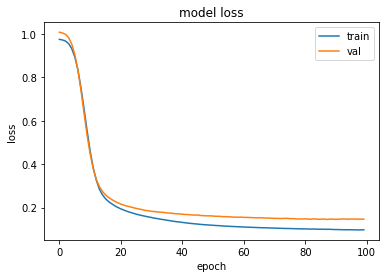

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [11]:
# Generating Predictions on testing data
Predictions_scaled = model.predict(X_test)

# Scaling the test data back to original scale
Test_Data = PredictorScaler.inverse_transform(X_test)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetScaler.inverse_transform(y_test)

# Scaling the predicted Price data back to original price scale
Predictions = TargetScaler.inverse_transform(Predictions_scaled)

# Create table with test data and predictions
TestingData = pd.DataFrame( data = Test_Data, columns = Predictors)
TestingData['Price'] = y_test_orig
TestingData['PredictedPrice'] = Predictions

# Computing the absolute percent error
APE = 100*(abs( (TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price']) )
TestingData['APE']=APE

TestingData.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice,APE
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9899.631836,0.506213
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,9978.729492,24.812126
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,9023.710938,20.316146
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9235.823242,7.177656
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8909.121094,0.456748


In [17]:
# Compute MAPE and accuracy

MAPE = np.mean(TestingData['APE'])
accuracy = 100 - MAPE

print('MAPE:', MAPE, 'accuracy:', accuracy)

MAPE: 8.974684082319326 accuracy: 91.02531591768067


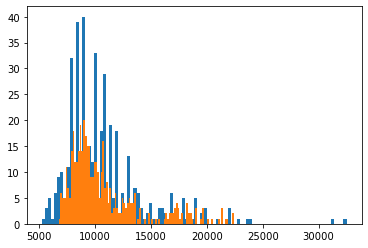

In [14]:
count, bins, ignored = plt.hist(y_test_orig, 100)
count, bins, ignored = plt.hist(Predictions, 100)
plt.show()

In [15]:
rel_error = (Predictions - y_test_orig)/y_test_orig

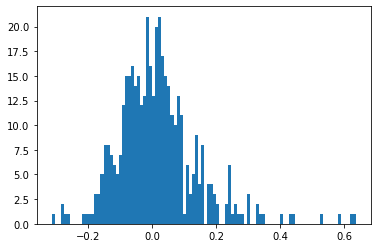

In [16]:
count, bins, ignored = plt.hist(rel_error, 100)
plt.show()